Model: "LSTM-Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 20)]              0         
                                                                 
 Embedding-Layer (Embedding  (None, 20, 60)            9000      
 )                                                               
                                                                 
 Encoder-Batchnorm-1 (Batch  (None, 20, 60)            240       
 Normalization)                                                  
                                                                 
 LSTM-Layer (LSTM)           [(None, 60),              29040     
                              (None, 60),                        
                              (None, 60)]                        
                                                                 
 Final-Output-Dense (Dense)  (None, 2)             

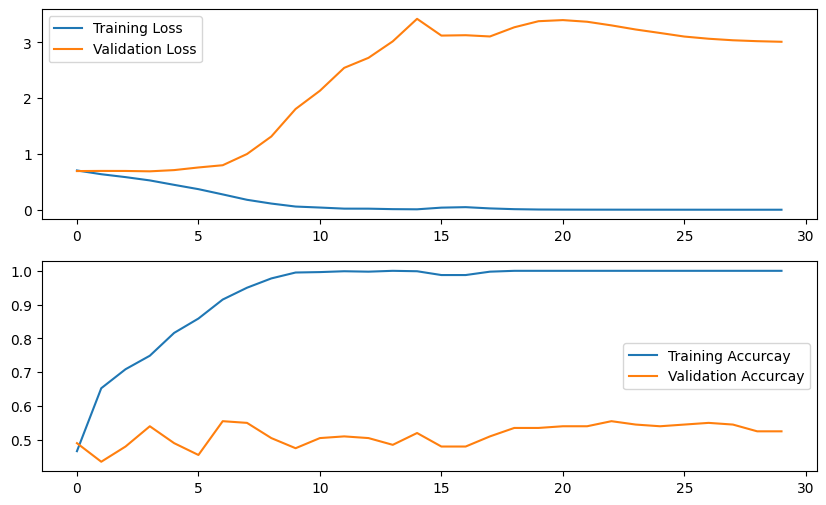

In [15]:
import numpy as np
from keras.models import Model
from keras.layers import Input,  LSTM, Dense, Embedding,BatchNormalization   
import matplotlib.pyplot as plt 
from plot_utils import plot_history 
np.random.seed (seed=2020)

input_dim = 20 
latent_dim = 60
num_labels  = 2
num_tokens = 150 

inp  = Input (shape=(input_dim,), name='Input-Layer')
x = Embedding(num_tokens, latent_dim, name='Embedding-Layer', mask_zero=False) (inp)
x = BatchNormalization(name='Encoder-Batchnorm-1')(x)
lstm_out, h_state, c_state   = LSTM (latent_dim, return_state=True,name='LSTM-Layer') (x)
final_out = Dense(num_labels, activation='softmax', name='Final-Output-Dense')(lstm_out)

model = Model (inp, final_out,name='LSTM-Classifier')
print(model.summary())

num_params = 4 * ( input_dim * latent_dim + latent_dim * latent_dim + latent_dim) 
print("num params=",num_params)

# craete some fake data 
X = np.random.randint (0, num_tokens, [1000, input_dim])
y = np.array ([np.sum (X[i,:]) %2 for i in range (0, 1000)])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X,y,epochs=30,validation_split=0.2)

plot_history (history)
